In [7]:
import pickle
#f = open("store.pckl", "wb")
#pickle.dump(my_object, f)
#f.close()

#f = open("store.pckl", "rb")
#my_object = pickle.load(f)
#f.close()

Louie Balderrama<br>
Springboard Data Science Career Track, January 2019 cohort<br>

<h1 align="center">Capstone Project II</h1>

## Introduction ##
**Problem Statement**: Classifying Amazon reviews based on customer ratings using NLP

<h4 align="center">Impact</h4>

Reviews provide objective feedback to a product and are therefore inherently useful for consumers. These ratings are often summarized by a numerical rating, or the number of stars. Of course there is more value in the actual text itself than the quantified stars. And at times, the given rating does not truly convey the experience of the product – the heart of the feedback is actually in the text itself. The goal therefore is to build a classifier that would understand the essence of a piece of review and assign it the most appropriate rating based on the meaning of the text.

<h4 align="center">Background</h4>

Though product ratings on Amazon are aggregated from all the reviews by every customer, each individual rating is actually only an integer that ranges from one star to five stars. This reduces our predictions to discrete classes totaling five possibilities. Therefore what we'll have is a supervised, multi-class classifier with the actual review text as the core predictor.

This study is an exploration of Natural Language Processing (NLP). The goal of predicting the star rating given a piece of text will take on different NLP topics including word embedding, topic modeling, and dimension reduction. From there, we'll arrive on a final dataframe and we'll be employing different machine learning techniques in order to come up with the best approach (i.e. most accurate estimator) for our classifier.

<h4 align="center" id="Datasets">Datasets</h4>

The [Amazon dataset](http://jmcauley.ucsd.edu/data/amazon/index.html) contains the customer reviews for all listed *Electronics* products spanning from May 1996 up to July 2014. There are a total of 1,689,188 reviews by a total of 192,403 customers on 63,001 unique products. The data dictionary is as follows:

*  **asin** - Unique ID of the product being reviewed, *string*
*  **helpful** - A list with two elements: the number of users that voted *helpful*, and the total number of users that voted on the review (including the *not helpful* votes), *list*
*  **overall** - The reviewer's rating of the product, *int64*
*  **reviewText** - The review text itself, *string*
*  **reviewerID** - Unique ID of the reviewer, *string*
*  **reviewerName** - Specified name of the reviewer, *string*
*  **summary** - Headline summary of the review, *string*
*  **unixReviewTime** - Unix Time of when the review was posted, *string*

In [45]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
import pandas as pd

from datetime import datetime

df = pd.read_json("Electronics_5.json", lines=True)
display(df.head(10))

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0528881469,"[0, 0]",5,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1370131200
1,0528881469,"[12, 15]",1,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1290643200
2,0528881469,"[43, 45]",3,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1283990400
3,0528881469,"[9, 10]",2,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1290556800
4,0528881469,"[0, 0]",1,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1317254400
5,0594451647,"[3, 3]",5,I am using this with a Nook HD+. It works as d...,"01 3, 2014",A2JXAZZI9PHK9Z,"Billy G. Noland ""Bill Noland""",HDMI Nook adapter cable,1388707200
6,0594451647,"[0, 0]",2,The cable is very wobbly and sometimes disconn...,"04 27, 2014",A2P5U7BDKKT7FW,Christian,Cheap proprietary scam,1398556800
7,0594451647,"[0, 0]",5,This adaptor is real easy to setup and use rig...,"05 4, 2014",AAZ084UMH8VZ2,"D. L. Brown ""A Knower Of Good Things""",A Perfdect Nook HD+ hook up,1399161600
8,0594451647,"[0, 0]",4,This adapter easily connects my Nook HD 7&#34;...,"07 11, 2014",AEZ3CR6BKIROJ,Mark Dietter,A nice easy to use accessory.,1405036800
9,0594451647,"[3, 3]",5,This product really works great but I found th...,"01 20, 2014",A3BY5KCNQZXV5U,Matenai,This works great but read the details...,1390176000


In [3]:
condition = lambda row: datetime.fromtimestamp(row).strftime("%m-%d-%Y")
df["unixReviewTime"] = df["unixReviewTime"].apply(condition)

In [4]:
df.drop(labels="reviewTime", axis=1, inplace=True)

In [5]:
print(df.columns)
display(df.head())

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')


,asin,helpful,overall,reviewText,reviewerID,reviewerName,summary,unixReviewTime
0,0528881469,"[0, 0]",5,We got this GPS for my husband who is an (OTR)...,AO94DHGC771SJ,amazdnu,Gotta have GPS!,06-01-2013
1,0528881469,"[12, 15]",1,"I'm a professional OTR truck driver, and I bou...",AMO214LNFCEI4,Amazon Customer,Very Disappointed,11-24-2010
2,0528881469,"[43, 45]",3,"Well, what can I say. I've had this unit in m...",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,09-08-2010
3,0528881469,"[9, 10]",2,"Not going to write a long review, even thought...",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",11-23-2010
4,0528881469,"[0, 0]",1,I've had mine for a year and here's what we go...,A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",09-28-2011


In [6]:
for col in df.columns:
    print(col)
    display(df[col].value_counts().head())

asin


B007WTAJTO    4915
B003ES5ZUU    4143
B00DR0PDNE    3798
B0019EHU8G    3435
B002WE6D44    2813
Name: asin, dtype: int64

helpful


[0, 0]    963227
[1, 1]    201597
[2, 2]     68757
[0, 1]     67890
[1, 2]     45798
Name: helpful, dtype: int64

overall


5    1009026
4     347041
3     142257
1     108725
2      82139
Name: overall, dtype: int64

reviewText


                1071
works great       37
Works great!      30
Works great       28
Works great.      24
Name: reviewText, dtype: int64

reviewerID


ADLVFFE4VBT8      431
A3OXHLG6DIBRW8    407
A6FIAB28IS79      367
A680RUE1FDO8B     352
A5JLAU2ARJ0BO     351
Name: reviewerID, dtype: int64

reviewerName


Amazon Customer    26961
Mike                2340
Chris               2127
John                2116
David               1679
Name: reviewerName, dtype: int64

summary


Works great      6784
Great            5415
Five Stars       5150
Perfect          4568
Great product    4403
Name: summary, dtype: int64

unixReviewTime


01-06-2014    3051
12-29-2013    2960
12-27-2012    2927
12-26-2012    2916
12-30-2013    2863
Name: unixReviewTime, dtype: int64

In [7]:
df.iloc[0].reviewText

'We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that\'s just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!'

In [8]:
df.overall.unique()

array([5, 1, 3, 2, 4], dtype=int64)

In [9]:
#temporarily cut down data
df_orig = df.copy()
df = df[:500]
df.head()

,asin,helpful,overall,reviewText,reviewerID,reviewerName,summary,unixReviewTime
0,0528881469,"[0, 0]",5,We got this GPS for my husband who is an (OTR)...,AO94DHGC771SJ,amazdnu,Gotta have GPS!,06-01-2013
1,0528881469,"[12, 15]",1,"I'm a professional OTR truck driver, and I bou...",AMO214LNFCEI4,Amazon Customer,Very Disappointed,11-24-2010
2,0528881469,"[43, 45]",3,"Well, what can I say. I've had this unit in m...",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,09-08-2010
3,0528881469,"[9, 10]",2,"Not going to write a long review, even thought...",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",11-23-2010
4,0528881469,"[0, 0]",1,I've had mine for a year and here's what we go...,A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",09-28-2011


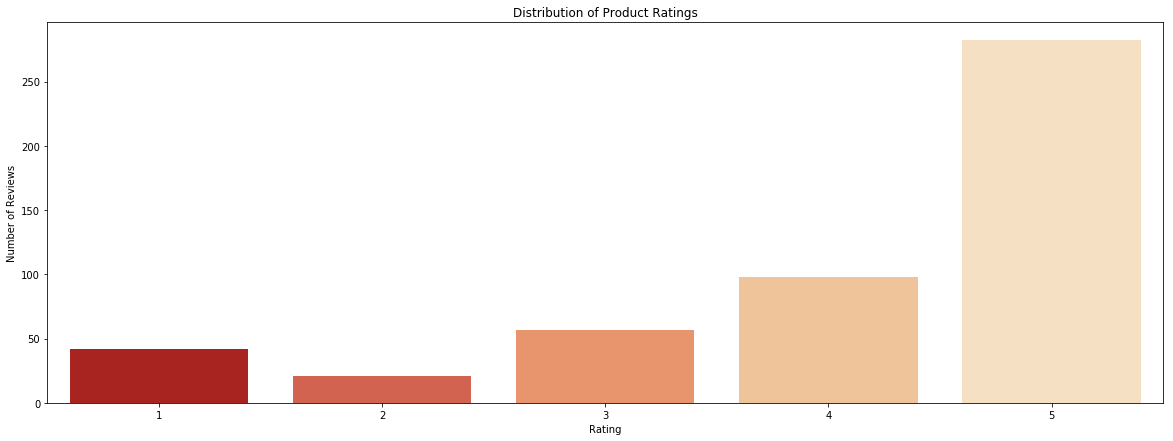

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=df["overall"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

In [11]:
len(df[df["overall"] == 5]) / len(df)

0.564

In [12]:
helpful = df["helpful"].tolist()
most_helpful = max(helpful, key=lambda x: x[0])

most_helpful_idx = df["helpful"].astype(str) == str(most_helpful)
most_helpful_idx = df[most_helpful_idx].index

print(df["reviewText"].iloc[most_helpful_idx].values[0])

I purchased the Kindle (Wi-Fi) and the original Nook (the B&W; one) and tried them out during the return period. While there were things about the Kindle I really liked (features that other reviewers on the Kindle site had written), the one thing that made me choose the Nook was the ability to borrow and read ebooks from my local library. Haven't been back to the library since!Now here comes the Nook Simple Touch Reader (Nook STR). I got one via pre-order when they came out in early June.  It has the same e-ink Pearl screen as the Kindle, so the screen contrast is no longer an issue. And wow, has the user interface improved over the original Nook! (which I thought was clunky) The entire e-ink Pearl screen has full touchscreen capability. On both the Kindle and the original Nook, I felt myself wanting to touch the screen to select a book to read, instead of using the buttons (on the Kindle) or the LCD touchscreen (on the original Nook) to highlight and select the desired ebook. On the N

In [13]:
#original
print(df["reviewText"].iloc[0])

We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that's just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!


In [14]:
import re

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

lemma = WordNetLemmatizer()

def lemmatize_word(tagged_token):
    lis = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith('J'):
            lis.append(lemma.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            lis.append(lemma.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            lis.append(lemma.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            lis.append(lemma.lemmatize(word, wordnet.ADV))
        else:          
            lis.append(word)
    return lis

def lemmatize_doc(document):
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document)
    for sentence in tokenized_sent:
        no_punctuation = re.sub(r"[`'\",.!?()]", "", sentence)
        tokenized_word = word_tokenize(no_punctuation)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)

df["preprocessed"] = df["reviewText"].apply(lambda row: lemmatize_doc(row))

print(df["preprocessed"].iloc[0])

We get this GPS for my husband who be an OTR over the road trucker Very Impressed with the shipping time it arrive a few day earlier than expect within a week of use however it start freeze up could of just be a glitch in that unit Worked great when it work Will work great for the normal person as well but do have the trucker option the big truck rout - tell you when a scale be come up ect Love the big screen the ease of use the ease of put address into memory Nothing really bad to say about the unit with the exception of it freeze which be probably one in a million and thats just my luck I contact the seller and within minute of my email I receive a email back with instruction for an exchange VERY impressed all the way around


In [15]:
#remove accents
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

df["preprocessed"] = df["preprocessed"].apply(remove_accent)

print(df["preprocessed"].iloc[0])

We get this GPS for my husband who be an OTR over the road trucker Very Impressed with the shipping time it arrive a few day earlier than expect within a week of use however it start freeze up could of just be a glitch in that unit Worked great when it work Will work great for the normal person as well but do have the trucker option the big truck rout - tell you when a scale be come up ect Love the big screen the ease of use the ease of put address into memory Nothing really bad to say about the unit with the exception of it freeze which be probably one in a million and thats just my luck I contact the seller and within minute of my email I receive a email back with instruction for an exchange VERY impressed all the way around


In [16]:
#remove punctuations
pattern = r"[^\w\s]"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl="", regex=True)

print(df["preprocessed"].iloc[0])

We get this GPS for my husband who be an OTR over the road trucker Very Impressed with the shipping time it arrive a few day earlier than expect within a week of use however it start freeze up could of just be a glitch in that unit Worked great when it work Will work great for the normal person as well but do have the trucker option the big truck rout  tell you when a scale be come up ect Love the big screen the ease of use the ease of put address into memory Nothing really bad to say about the unit with the exception of it freeze which be probably one in a million and thats just my luck I contact the seller and within minute of my email I receive a email back with instruction for an exchange VERY impressed all the way around


In [17]:
#lower case words
df["preprocessed"] = df["preprocessed"].str.lower()

print(df["preprocessed"].iloc[0])

we get this gps for my husband who be an otr over the road trucker very impressed with the shipping time it arrive a few day earlier than expect within a week of use however it start freeze up could of just be a glitch in that unit worked great when it work will work great for the normal person as well but do have the trucker option the big truck rout  tell you when a scale be come up ect love the big screen the ease of use the ease of put address into memory nothing really bad to say about the unit with the exception of it freeze which be probably one in a million and thats just my luck i contact the seller and within minute of my email i receive a email back with instruction for an exchange very impressed all the way around


In [18]:
#remove stop words
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

print(stop_words[:10])

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
df["preprocessed"] = df["preprocessed"].apply(remove_stop_words)

df["preprocessed"].iloc[0]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


'get gps husband otr road trucker impressed shipping time arrive day earlier expect within week use however start freeze could glitch unit worked great work work great normal person well trucker option big truck rout  tell scale come ect love big screen ease use ease put address memory nothing really bad say unit exception freeze probably one million thats luck contact seller within minute email receive email back instruction exchange impressed way around'

In [19]:
#remove extra spaces
pattern = r"[\s]+"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df["preprocessed"].iloc[0])

get gps husband otr road trucker impressed shipping time arrive day earlier expect within week use however start freeze could glitch unit worked great work work great normal person well trucker option big truck rout tell scale come ect love big screen ease use ease put address memory nothing really bad say unit exception freeze probably one million thats luck contact seller within minute email receive email back instruction exchange impressed way around


In [20]:
#tokenizing corpus
corpus = df["preprocessed"].values
tokenized = [corpora.split(" ") for corpora in corpus]

print(tokenized[0])

['get', 'gps', 'husband', 'otr', 'road', 'trucker', 'impressed', 'shipping', 'time', 'arrive', 'day', 'earlier', 'expect', 'within', 'week', 'use', 'however', 'start', 'freeze', 'could', 'glitch', 'unit', 'worked', 'great', 'work', 'work', 'great', 'normal', 'person', 'well', 'trucker', 'option', 'big', 'truck', 'rout', 'tell', 'scale', 'come', 'ect', 'love', 'big', 'screen', 'ease', 'use', 'ease', 'put', 'address', 'memory', 'nothing', 'really', 'bad', 'say', 'unit', 'exception', 'freeze', 'probably', 'one', 'million', 'thats', 'luck', 'contact', 'seller', 'within', 'minute', 'email', 'receive', 'email', 'back', 'instruction', 'exchange', 'impressed', 'way', 'around']


In [21]:
print(corpus[0])

get gps husband otr road trucker impressed shipping time arrive day earlier expect within week use however start freeze could glitch unit worked great work work great normal person well trucker option big truck rout tell scale come ect love big screen ease use ease put address memory nothing really bad say unit exception freeze probably one million thats luck contact seller within minute email receive email back instruction exchange impressed way around


In [22]:
#phrase modeling
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized, min_count=30, threshold=100)

tri_gram = Phrases(bi_gram[tokenized], min_count=30, threshold=100)

In [23]:
#uni-gram tokens set
uni_gram_tokens = set([token for text in tokenized for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))

In [24]:
bigram_min = bi_gram.min_count

bi_condition = lambda x: x[1] >= bigram_min

bi_gram_tokens = dict(filter(bi_condition, bi_gram.vocab.items()))
bi_gram_tokens = set([token.decode("utf-8") \
                      for token in bi_gram_tokens])

bi_grams_only = bi_gram_tokens.difference(uni_gram_tokens)
print(list(bi_grams_only)[:50])

['original_nook', 'sd_card', 'tv_mount', 'nook_tablet', 'work_well', 'nook_hd', 'battery_life', 'kindle_fire', 'b_n', 'barnes_noble', 'page_turn', 'nook_color', 'android_tablet', 'touch_screen', 'read_book', 'wall_mount', 'work_great', 'easy_install']


In [25]:
trigram_min = tri_gram.min_count

tri_condition = lambda x: x[1] >= trigram_min

tri_gram_tokens = dict(filter(tri_condition, tri_gram.vocab.items()))
tri_gram_tokens = set([token.decode("utf-8") \
                       for token in tri_gram_tokens])

tri_grams_only = tri_gram_tokens.difference(bi_gram_tokens)
print(list(tri_grams_only)[:50])

[]


In [26]:
%%time
#applying bigrams and trigrams
tokenized = [Phraser(tri_gram)[Phraser(bi_gram)[i]] for i in tokenized]

Wall time: 4min 54s


In [27]:
#creating vocabulary
from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(tokenized)

vocabulary_keys = list(vocabulary.token2id)[0:10]

for key in vocabulary_keys:
    print(f"ID: {vocabulary.token2id[key]}, Token: {key}")

ID: 0, Token: address
ID: 1, Token: around
ID: 2, Token: arrive
ID: 3, Token: back
ID: 4, Token: bad
ID: 5, Token: big
ID: 6, Token: come
ID: 7, Token: contact
ID: 8, Token: could
ID: 9, Token: day


In [28]:
import spacy

from spacy import displacy
from collections import defaultdict

ner = spacy.load("en")

most_helpful_text = df["reviewText"].iloc[most_helpful_idx]
most_helpful_text = most_helpful_text.values[0]

ner_helpful = ner(most_helpful_text)

ner_dict = defaultdict(list)
for entity in ner_helpful.ents:
    ner_dict[entity.label_].append(entity)

for NER, name in ner_dict.items():
    print(f"{NER}:\n{name}\n")

LOC:
[the Kindle (Wi-Fi, the Kindle I really]

PERSON:
[Nook, Nook STR, Nook ST]

CARDINAL:
[one, one, one, touchscreen, touchscreen, one, One]

GPE:
[Kindle, Kindle, Library]

ORG:
[Nook, Pearl, Nook, Pearl, Nook, Nook, Touch, Touch, Touch, iPhone, iPad, iPhone, iPhone, Nook, Adobe Digital Editions, Adobe Digital Editions]

DATE:
[early June, six weeks, Friday, other days of the week]

PRODUCT:
[the Nook STR, the Nook STR, Nook STR, Nook, The Nook STR, Nook STR]

NORP:
[ ]

WORK_OF_ART:
[Shop]



In [29]:
displacy.render(ner_helpful, style="ent", jupyter=True)

In [30]:
def ner_displacy(sentence):
    ner_sentence = ner(sentence)
    displacy.render(ner_sentence, jupyter=True, \
                    options={"compact": False, \
                             "distance": 90, \
                             "word_spacing":20, \
                             "arrow_spacing":10, \
                             "arrow_stroke": 2, \
                             "arrow_width": 5})

for sentence in most_helpful_text.split(".")[0:3]:
    ner_displacy(sentence)

In [31]:
#bag of words model
bow = [vocabulary.doc2bow(doc) for doc in tokenized]

for idx, freq in bow[0]:
    print(f"Word: {vocabulary.get(idx)}, Frequency: {freq}")
    #vocabulary.get(1)

Word: address, Frequency: 1
Word: around, Frequency: 1
Word: arrive, Frequency: 1
Word: back, Frequency: 1
Word: bad, Frequency: 1
Word: big, Frequency: 2
Word: come, Frequency: 1
Word: contact, Frequency: 1
Word: could, Frequency: 1
Word: day, Frequency: 1
Word: earlier, Frequency: 1
Word: ease, Frequency: 2
Word: ect, Frequency: 1
Word: email, Frequency: 2
Word: exception, Frequency: 1
Word: exchange, Frequency: 1
Word: expect, Frequency: 1
Word: freeze, Frequency: 2
Word: get, Frequency: 1
Word: glitch, Frequency: 1
Word: gps, Frequency: 1
Word: great, Frequency: 2
Word: however, Frequency: 1
Word: husband, Frequency: 1
Word: impressed, Frequency: 2
Word: instruction, Frequency: 1
Word: love, Frequency: 1
Word: luck, Frequency: 1
Word: memory, Frequency: 1
Word: million, Frequency: 1
Word: minute, Frequency: 1
Word: normal, Frequency: 1
Word: nothing, Frequency: 1
Word: one, Frequency: 1
Word: option, Frequency: 1
Word: otr, Frequency: 1
Word: person, Frequency: 1
Word: probably, Fr

In [32]:
#tfidf model
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(bow)

for idx, weight in tfidf[bow[0]]:
    print(f"Word: {vocabulary.get(idx)}, Weight: {weight}")

Word: address, Weight: 0.12613870232245883
Word: around, Weight: 0.06963376540132249
Word: arrive, Weight: 0.12613870232245883
Word: back, Weight: 0.05264886700808622
Word: bad, Weight: 0.07629135010008785
Word: big, Weight: 0.1357804218556907
Word: come, Weight: 0.05706677559068806
Word: contact, Weight: 0.1225458605180406
Word: could, Weight: 0.055521944288039006
Word: day, Weight: 0.06041302026524478
Word: earlier, Weight: 0.14047564548215777
Word: ease, Weight: 0.20999002169452877
Word: ect, Weight: 0.18956977674804218
Word: email, Weight: 0.14170816816266613
Word: exception, Weight: 0.16842608527284775
Word: exchange, Weight: 0.14047564548215777
Word: expect, Weight: 0.0802584775676517
Word: freeze, Weight: 0.2945647875953066
Word: get, Weight: 0.03133428489637416
Word: glitch, Weight: 0.1472823937976533
Word: gps, Weight: 0.10906823893949319
Word: great, Weight: 0.07636733240222365
Word: however, Weight: 0.0770445710565744
Word: husband, Weight: 0.11642462192404261
Word: impresse

In [33]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [34]:
%%time
from gensim.models.ldamulticore import LdaMulticore

num_topics = 10
bow_lda = LdaMulticore(bow, num_topics=num_topics, id2word=vocabulary, \
                       passes=5, workers=cores, random_state=42)
for token, frequency in bow_lda.show_topic(0, topn=5):
    print(token, frequency)

use 0.010855171
one 0.010454488
nook 0.009323482
mount 0.009254292
screen 0.008781553
Wall time: 5.18 s


In [35]:
for topic in range(0, num_topics):
    print(f"Topic {topic+1}:")
    for token, frequency in bow_lda.show_topic(topic, topn=5):
        print(f" {token}, {frequency}")
    print("\n")

Topic 1:
 use, 0.010855170898139477
 one, 0.01045448798686266
 nook, 0.009323482401669025
 mount, 0.009254291653633118
 screen, 0.008781553246080875


Topic 2:
 mount, 0.015584571287035942
 nook, 0.01305079460144043
 book, 0.012239651754498482
 tv, 0.011213035322725773
 read, 0.008896994404494762


Topic 3:
 nook, 0.02408771589398384
 tablet, 0.016615746542811394
 read, 0.014095114544034004
 book, 0.012800125405192375
 use, 0.011009234003722668


Topic 4:
 nook, 0.021222945302724838
 use, 0.010299728251993656
 get, 0.009017479605972767
 good, 0.008892672136425972
 mount, 0.008813610300421715


Topic 5:
 great, 0.014653289690613747
 mount, 0.010839926078915596
 use, 0.010170983150601387
 book, 0.00927556399255991
 easy, 0.006963743828237057


Topic 6:
 nook, 0.016885971650481224
 book, 0.013793363235890865
 like, 0.010159098543226719
 screen, 0.008890699595212936
 one, 0.008047761395573616


Topic 7:
 nook, 0.026446443051099777
 book, 0.01836865395307541
 kindle, 0.011786052025854588
 s

In [36]:
import pyLDAvis.gensim

lda_idm = pyLDAvis.gensim.prepare(bow_lda, bow, vocabulary)

pyLDAvis.display(lda_idm)

In [37]:
%%time
import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)

feature_size = 100
context_size = 20
min_word = 1

word_vec= word2vec.Word2Vec(tokenized, size=feature_size, \
                            window=context_size, min_count=min_word, \
                            iter=50, seed=42)

word_bank = ["nook", "phone", "tv", "good", "price"]

for word in word_bank[:]:
    related_vec = word_vec.wv.most_similar(word, topn=5)
    related_words = np.array(related_vec)[:,0]
    word_bank.extend(related_words)
    print(f"{word}: {related_words}")

nook: ['decision' 'edition' 'niche' 'original' 'ereaders']
phone: ['os' 'angry' 'benchmark' 'bastard' 'signal']
tv: ['mount' 'swing' 'wall' 'flush' 'onits']
good: ['excellent' 'primarily' 'questionable' 'responsive' 'acceptable']
price: ['value' 'everythingoveralli' 'inferior' '250' 'marvel']
Wall time: 2.44 s


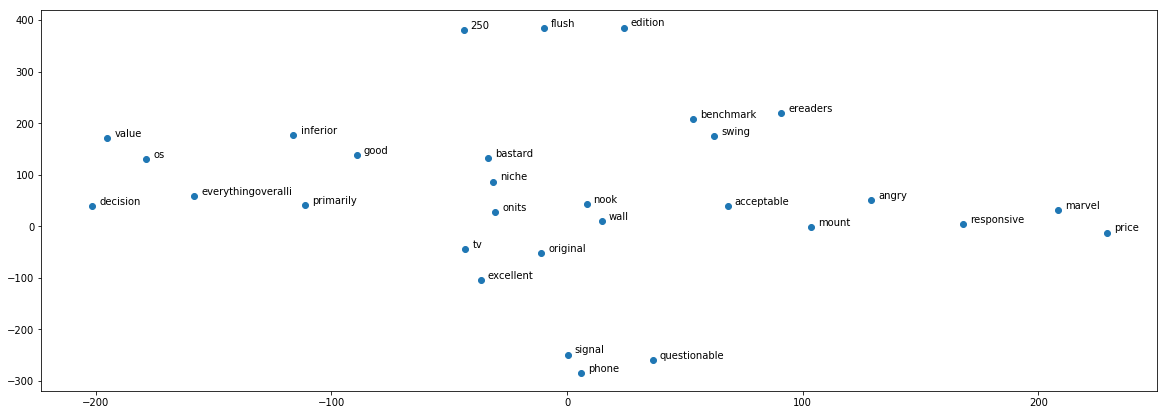

In [38]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)

sample_vecs = word_vec.wv[set(word_bank)]
sample_tsne = tsne.fit_transform(sample_vecs)
tsne_x = sample_tsne[:, 0]
tsne_y = sample_tsne[:, 1]

f, axes = plt.subplots(figsize=(20,7))
ax = plt.scatter(x=tsne_x, y=tsne_y)

for label, x, y in zip(word_bank, tsne_x, tsne_y):
    plt.annotate(label, xy=(x+3, y+3))

plt.show()

In [39]:
#word algebra

word_vec.wv.most_similar(positive=["book", "screen"], \
                      negative=[], topn=1)

[('downside', 0.8485075235366821)]

In [40]:
word_vec.wv.most_similar(positive=["cheap"], \
                      negative=["quality"], topn=1)

[('restrict', 0.798964262008667)]

In [41]:
word_vec.wv.most_similar(positive=["phone"], \
                      negative=["internet"], topn=1)

[('substantially', 0.6691980361938477)]

In [46]:
mean_vectors = np.zeros(feature_size)

for document in tokenized:
    if np.shape(document) != (0, ):
        vector_list = [word_vec[word] for word in document] 
        vector_array = np.array(vector_list)
        vector_array = [np.mean(vector_array[:,i]) \
                        for i in range(feature_size)]
    else:
        vector_array = np.zeros(100)
    mean_vectors = np.vstack((mean_vectors, vector_array))
    
model_df = pd.DataFrame(mean_vectors[1:])
model_df["label"] = df["overall"]

display(model_df.head())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,-0.255508,0.143434,0.368103,-0.413267,0.098661,-0.627452,-0.534034,0.569980,0.197784,-0.358712,...,0.146143,0.224225,-0.280234,-0.650052,-0.359887,0.097208,0.296708,0.086846,0.354765,5
1,-0.438834,0.022610,0.299373,-0.169353,0.061760,-0.208327,-0.293640,0.674809,0.344548,-0.027941,...,0.113670,0.660235,-0.492216,-0.829993,-0.141253,0.248219,0.703010,0.280374,0.623668,1
2,-0.365678,-0.000344,0.544086,0.113730,-0.120061,-0.326185,-0.164079,0.241701,0.252076,-0.071911,...,0.100422,0.138673,-0.476096,-0.506581,-0.138009,0.391478,0.830178,0.403170,0.369876,3
3,-0.430837,0.140883,0.516206,-0.115100,-0.127310,-0.485019,-0.531203,0.420842,0.355543,-0.150453,...,0.097409,0.185780,-0.429916,-0.471799,-0.080970,0.586583,0.519458,0.360107,0.393488,2
4,-0.559831,0.124429,0.536423,-0.176421,0.052696,-0.304859,-0.186814,0.642540,0.429088,-0.216943,...,0.242970,0.261045,-0.500465,-0.597345,-0.228895,0.284253,0.824675,0.090857,0.610857,1


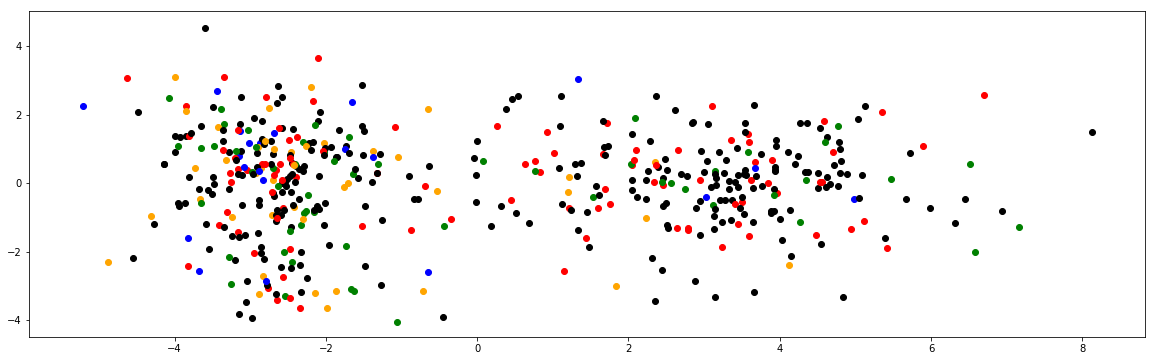

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(model_df[:-1])
labels = model_df["label"]
plt.figure(figsize=(20, 6))

for i in range(len(labels)):
    label = labels[i]
    color = 'orange' if label == 1 else 'blue' if label == 2 else 'green' if label == 3 else "red" if label == 4 else "black"
    x, y = pcs[i-1]
    plt.scatter(x, y, c=color)
    #plt.annotate(annotation_label, xy=(x+1e-4, y+1e-3), xytext=(0, 0), textcoords='offset points')


In [44]:
#word cloud for visualization AFTER the model is trained and tuned